In [2]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
# Print to show there are 1797 images (8 by 8 images: dimensionality of 64)
print("Image Dataset Shape" , digits.data.shape)


Image Dataset Shape (1797, 64)


In [5]:
first_image = digits.data[0,:]
x=digits.data
print(first_image)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
type(digits)

sklearn.utils._bunch.Bunch

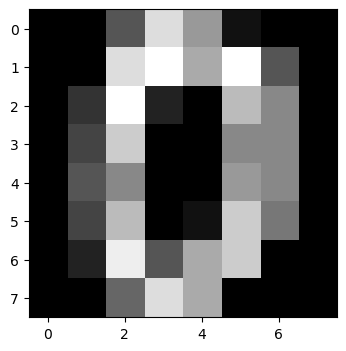

In [7]:
plt.figure(figsize=(10,4))
plt.imshow(np.reshape(first_image, (8,8)), cmap=plt.cm.gray)

____
___________
# Data Augmentaion 
__________
_____________

# Loading the image

In [8]:
image_path= "G://My Drive\Ai Training MetaPi\Assignments_MetaPi\Assign Lab Augementation of MNIST Data\Augmt_data.png"

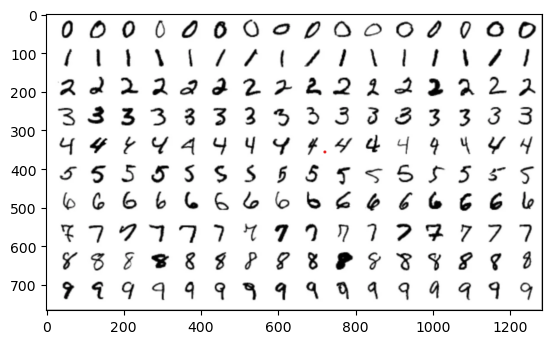

In [9]:
img=Image.open(image_path)
plt.imshow(img)

# Converting the image to numpy array

In [10]:
img=np.array(img)
print(img.shape)

(766, 1284, 4)


# Dataset Prepration

*Image directory path*

In [11]:
img_folder = "G://My Drive\Ai Training MetaPi\Assignments_MetaPi\Assign Lab Augementation of MNIST Data\DataSets"


In [12]:
image_list = [Image.open(os.path.join(img_folder, img)) for img in os.listdir(img_folder)]

In [13]:
image_array_list = [np.array(img) for img in image_list]

In [14]:
print(len(image_array_list))
len(image_array_list)

20


20

In [15]:
# Assuming your list is called 'image_array_list'
new_size = (8, 8)

resized_images = []

for img_array in image_array_list:
    img = Image.fromarray(img_array)  # Convert array to PIL Image
    img_gray = img.convert('L')  # Convert to grayscale
    resized_img = img_gray.resize(new_size, Image.ANTIALIAS)  # Resize with anti-aliasing
    resized_images.append(resized_img)


C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_15564\1807931140.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img_gray.resize(new_size, Image.ANTIALIAS)  # Resize with anti-aliasing


In [16]:
print(type(resized_images))
resized_images_arr= np.array(resized_images)

<class 'list'>


C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_15564\2543827182.py:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  resized_images_arr= np.array(resized_images)
C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_15564\2543827182.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  resized_images_arr= np.array(resized_images)


In [17]:
print(type(resized_images_arr))
print(resized_images_arr.shape)

<class 'numpy.ndarray'>
(20,)


# Splitting the data 

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30,random_state=100)

In [19]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(1257, 64)


# Appending the new data 

In [20]:

new_data = np.array([np.array(img).flatten() for img in resized_images_arr])
x_train_updated = np.concatenate((x_train, new_data), axis=0)
print(x_train_updated.shape)
print(x_train_updated[1276])


(1277, 64)
[255. 255. 254. 255. 255. 255. 255. 255. 255. 254. 255. 238. 150. 218.
 255. 254. 253. 254. 210.  71. 113. 151. 255. 253. 252. 255. 174.  44.
  84. 204. 255. 253. 255. 255. 255. 238.  68. 217. 255. 253. 255. 254.
 255. 247.  75. 231. 255. 254. 255. 255. 254. 253. 153. 177. 255. 253.
 255. 255. 255. 255. 255. 255. 255. 255.]


In [21]:
labels_set_1=np.arange(10)
labels_set_2=np.arange(10)
new_labels= [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9]
new_labels=np.array(new_labels)

In [22]:
print(type(y_train))
print(type(new_labels))
print(new_labels)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [23]:
y_train_updated = np.concatenate((y_train, new_labels), axis=0)


In [24]:
print(y_train.shape)
print(y_train_updated.shape)

(1257,)
(1277,)


**Using KNN Classifier**

In [25]:
#Finally, we are training our Logistic Regression model.
classifier = KNeighborsClassifier(n_neighbors=3)

# Training 

In [26]:
classifier.fit(x_train_updated, y_train_updated)

KNeighborsClassifier(n_neighbors=3)

In [27]:
predictions = classifier.predict(x_test)

In [28]:
predictions=predictions.reshape(-1,1)

# Testing Accuracy 

In [29]:
score=accuracy_score(y_test,predictions)
print(score)

0.9962962962962963


In [30]:
x_predictions = classifier.predict(x_train_updated)

In [31]:
x_predictions=x_predictions.reshape(-1,1)

# Training Accuracy

In [32]:
score= accuracy_score(x_predictions,y_train_updated)
print(score)

0.9835552075176194


# Inference the model

In [83]:
pred_index= 21
test_image=x_test[pred_index]
img_flat=test_image.flatten()
re_img= img_flat.reshape(1,-1)

*Predicted*

In [84]:
classifier.predict(re_img)

array([7])

*Actual*

In [85]:
print(y_test[pred_index])

7
